In [1]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 150

# Create synthetic dataset
df = pd.DataFrame({
    'Name': [f'Person_{i}' for i in range(n_samples)],
    'Age': np.random.normal(loc=35, scale=10, size=n_samples).round(1),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'JobRole': np.random.choice(['Engineer', 'Manager', 'Clerk', 'Analyst'], size=n_samples),
    'Experience': np.random.randint(0, 20, size=n_samples),
    'Salary': np.random.normal(loc=60000, scale=15000, size=n_samples).round(2),
    'EducationLevel': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], size=n_samples),
    'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], size=n_samples),
    'Department': np.random.choice(['HR', 'IT', 'Finance', 'Marketing'], size=n_samples),
    'PerformanceScore': np.random.randint(1, 6, size=n_samples),
    'Promoted': np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Binary target for classification
})

# Introduce missing values
for col in ['Age', 'Salary', 'EducationLevel']:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Introduce outliers in Salary
outlier_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[outlier_indices, 'Salary'] *= 4  # Inflate salary to create outliers

# Show sample
df.head()


,Name,Age,Gender,JobRole,Experience,Salary,EducationLevel,Location,Department,PerformanceScore,Promoted
0,Person_0,40.0,Female,Engineer,9,31548.79,Bachelors,Urban,Finance,5,0
1,Person_1,33.6,Female,Analyst,18,68986.40,High School,Urban,IT,3,1
2,Person_2,41.5,Female,Manager,0,57478.94,High School,Rural,Finance,4,1
3,Person_3,50.2,Male,Clerk,4,64277.63,Bachelors,Rural,IT,5,0
4,Person_4,32.7,Female,Engineer,12,52921.20,PhD,Suburban,Finance,4,1


In [2]:
df

,Name,Age,Gender,JobRole,Experience,Salary,EducationLevel,Location,Department,PerformanceScore,Promoted
0,Person_0,40.0,Female,Engineer,9,31548.79,Bachelors,Urban,Finance,5,0
1,Person_1,33.6,Female,Analyst,18,68986.40,High School,Urban,IT,3,1
2,Person_2,41.5,Female,Manager,0,57478.94,High School,Rural,Finance,4,1
3,Person_3,50.2,Male,Clerk,4,64277.63,Bachelors,Rural,IT,5,0
4,Person_4,32.7,Female,Engineer,12,52921.20,PhD,Suburban,Finance,4,1
...,...,...,...,...,...,...,...,...,...,...,...
145,Person_145,42.8,Female,Manager,12,50639.75,Bachelors,Urban,Finance,5,1
146,Person_146,22.6,Male,Engineer,16,66023.41,PhD,Suburban,HR,1,0
147,Person_147,NaN,Female,Analyst,0,84704.24,Bachelors,Rural,Finance,2,1
148,Person_148,40.2,Male,Manager,5,NaN,Masters,Suburban,HR,1,1


## Initial Exploration

### Unique values

In [5]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [6]:
for i in df.columns:
    print(f"{i}: ",df[i].unique())

Name:  ['Person_0' 'Person_1' 'Person_2' 'Person_3' 'Person_4' 'Person_5'
 'Person_6' 'Person_7' 'Person_8' 'Person_9' 'Person_10' 'Person_11'
 'Person_12' 'Person_13' 'Person_14' 'Person_15' 'Person_16' 'Person_17'
 'Person_18' 'Person_19' 'Person_20' 'Person_21' 'Person_22' 'Person_23'
 'Person_24' 'Person_25' 'Person_26' 'Person_27' 'Person_28' 'Person_29'
 'Person_30' 'Person_31' 'Person_32' 'Person_33' 'Person_34' 'Person_35'
 'Person_36' 'Person_37' 'Person_38' 'Person_39' 'Person_40' 'Person_41'
 'Person_42' 'Person_43' 'Person_44' 'Person_45' 'Person_46' 'Person_47'
 'Person_48' 'Person_49' 'Person_50' 'Person_51' 'Person_52' 'Person_53'
 'Person_54' 'Person_55' 'Person_56' 'Person_57' 'Person_58' 'Person_59'
 'Person_60' 'Person_61' 'Person_62' 'Person_63' 'Person_64' 'Person_65'
 'Person_66' 'Person_67' 'Person_68' 'Person_69' 'Person_70' 'Person_71'
 'Person_72' 'Person_73' 'Person_74' 'Person_75' 'Person_76' 'Person_77'
 'Person_78' 'Person_79' 'Person_80' 'Person_81' 'Pers

In [7]:
for i in df.columns:
    print(f"{i}: ",df[i].nunique())

Name:  150
Age:  111
Gender:  2
JobRole:  4
Experience:  20
Salary:  135
EducationLevel:  4
Location:  3
Department:  4
PerformanceScore:  5
Promoted:  2


In [8]:
df.shape

(150, 11)

In [9]:
df.dtypes

Name                 object
Age                 float64
Gender               object
JobRole              object
Experience            int32
Salary              float64
EducationLevel       object
Location             object
Department           object
PerformanceScore      int32
Promoted              int32
dtype: object

In [10]:
df.isnull().sum()

Name                 0
Age                 15
Gender               0
JobRole              0
Experience           0
Salary              15
EducationLevel      15
Location             0
Department           0
PerformanceScore     0
Promoted             0
dtype: int64

In [11]:
df.describe()

,Age,Experience,Salary,PerformanceScore,Promoted
count,135.000000,150.000000,135.000000,150.000000,150.000000
mean,34.197037,9.520000,67746.035259,2.920000,0.366667
std,9.415951,5.790202,44833.202688,1.430821,0.483509
min,8.800000,0.000000,7827.460000,1.000000,0.000000
25%,28.250000,4.000000,50328.020000,2.000000,0.000000
50%,34.600000,9.500000,61647.900000,3.000000,0.000000
75%,39.850000,15.000000,71747.320000,4.000000,1.000000
max,59.600000,19.000000,392355.480000,5.000000,1.000000


<Axes: >

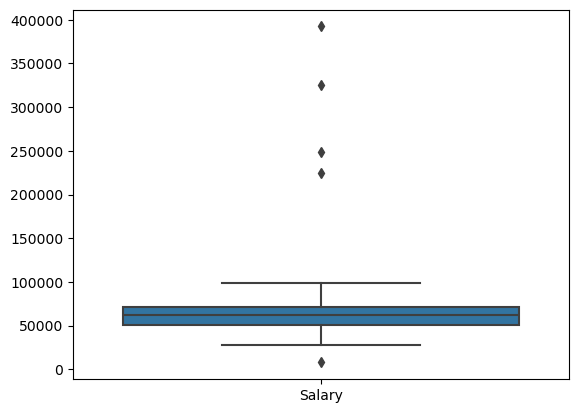

In [12]:
import seaborn as sns
sns.boxplot(df[['Salary','JobRole']])

## Data Cleaning

### Handle the null values

#### Impute the missing values based on the measures of central tendencies.

In [15]:
import seaborn as sns

D:\Applications\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

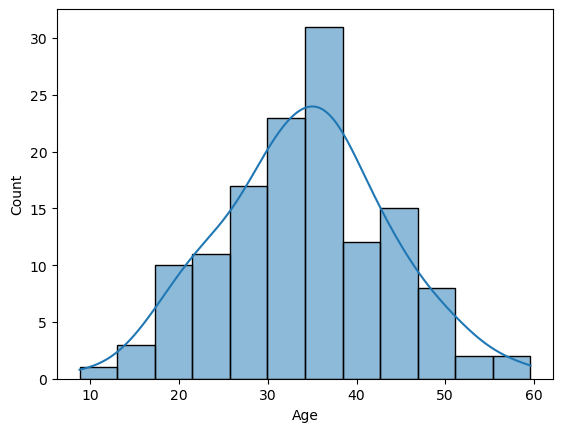

In [16]:
sns.histplot(df['Age'], kde=True)

#### bell Shaped so fill with MEAN.

In [18]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

#### After Imputing

D:\Applications\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

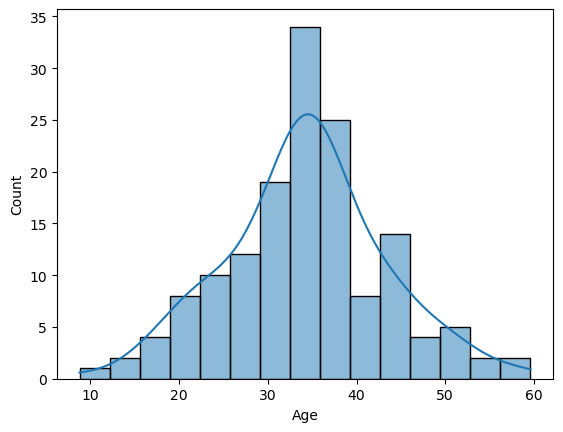

In [20]:
sns.histplot(df['Age'], kde=True)

### Fill Salary

D:\Applications\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Count'>

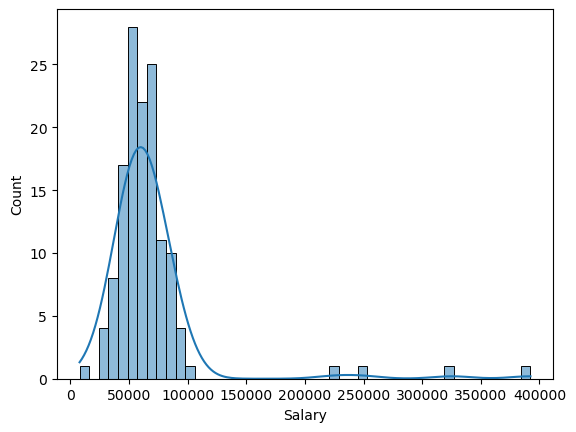

In [22]:
sns.histplot(df['Salary'], kde=True)

#### 'Left Skewed' with outliers, so fill with MEDIAN (vise versa for 'Right skewed')

In [24]:
df['Salary'].fillna(df['Salary'].median(), inplace=True)

#### After Imputing 

D:\Applications\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Count'>

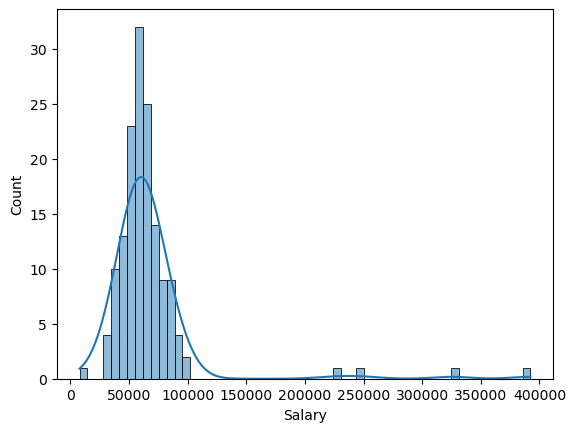

In [26]:
sns.histplot(df['Salary'], kde=True)

### Fill Education Level

D:\Applications\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EducationLevel', ylabel='Count'>

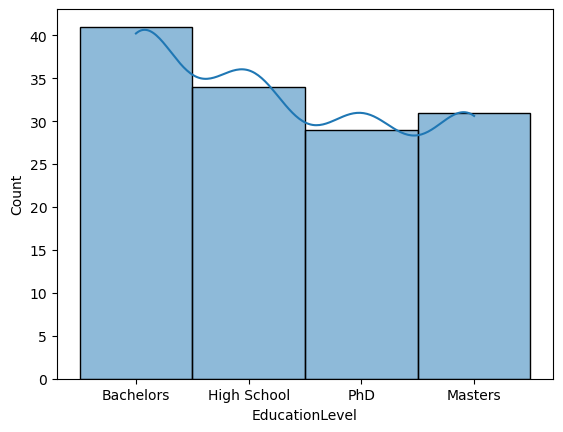

In [28]:
sns.histplot(df['EducationLevel'], kde=True)

#### Here also no Bell shape. But it is a categorical value, so fill either with "Unknown" or mode - highest one.

In [30]:
df['EducationLevel'].fillna(df['EducationLevel'].mode()[0], inplace=True)

In [31]:
df.isnull().sum()

Name                0
Age                 0
Gender              0
JobRole             0
Experience          0
Salary              0
EducationLevel      0
Location            0
Department          0
PerformanceScore    0
Promoted            0
dtype: int64

### Outlier Removal

#### Manual Method

In [34]:
import matplotlib.pyplot as plt

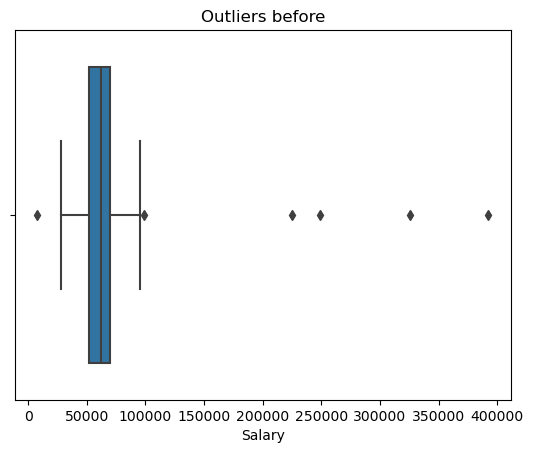

In [35]:
sns.boxplot(x=df['Salary'])
plt.title("Outliers before")
plt.show()

In [36]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_salary = df[(df['Salary'] >= lower)&(df['Salary'] <= upper)]

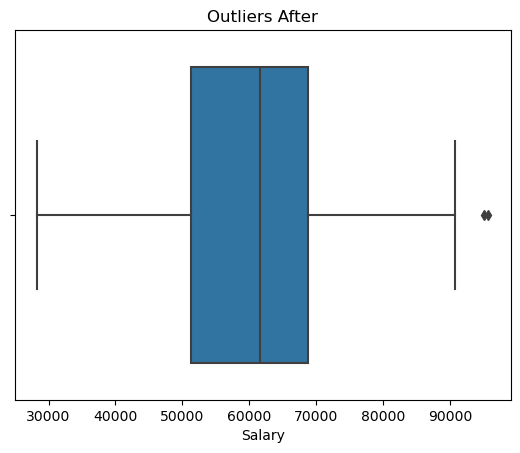

In [37]:
sns.boxplot(x=df_salary['Salary'])
plt.title("Outliers After")
plt.show()

#### Automatic

In [39]:
df.head()

,Name,Age,Gender,JobRole,Experience,Salary,EducationLevel,Location,Department,PerformanceScore,Promoted
0,Person_0,40.0,Female,Engineer,9,31548.79,Bachelors,Urban,Finance,5,0
1,Person_1,33.6,Female,Analyst,18,68986.40,High School,Urban,IT,3,1
2,Person_2,41.5,Female,Manager,0,57478.94,High School,Rural,Finance,4,1
3,Person_3,50.2,Male,Clerk,4,64277.63,Bachelors,Rural,IT,5,0
4,Person_4,32.7,Female,Engineer,12,52921.20,PhD,Suburban,Finance,4,1


In [40]:
df.dtypes

Name                 object
Age                 float64
Gender               object
JobRole              object
Experience            int32
Salary              float64
EducationLevel       object
Location             object
Department           object
PerformanceScore      int32
Promoted              int32
dtype: object

In [41]:
num_cols = df.select_dtypes(include = ["int32", "float64"]).columns

In [42]:
num_cols

Index(['Age', 'Experience', 'Salary', 'PerformanceScore', 'Promoted'], dtype='object')

In [43]:
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] >= lower)&(df[col] <= upper)]
    outlier_summary[col] = len(outliers)
    

outlier_summary

{'Age': 143,
 'Experience': 150,
 'Salary': 144,
 'PerformanceScore': 150,
 'Promoted': 150}

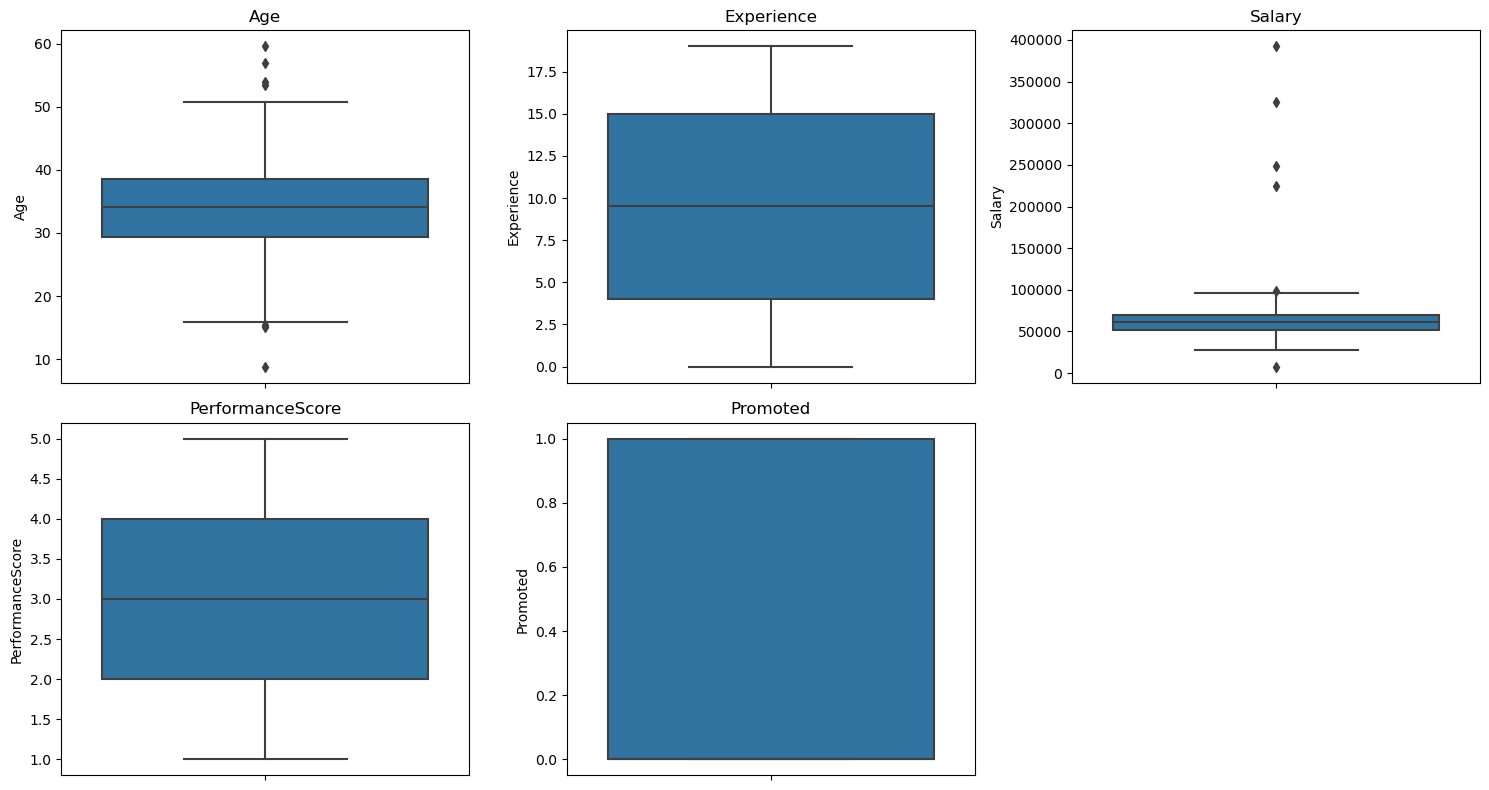

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [45]:
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Keep only values within the IQR range
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print("Original dataset shape:", df.shape)
print("After outlier removal:", df_clean.shape)

Original dataset shape: (150, 11)
After outlier removal: (138, 11)


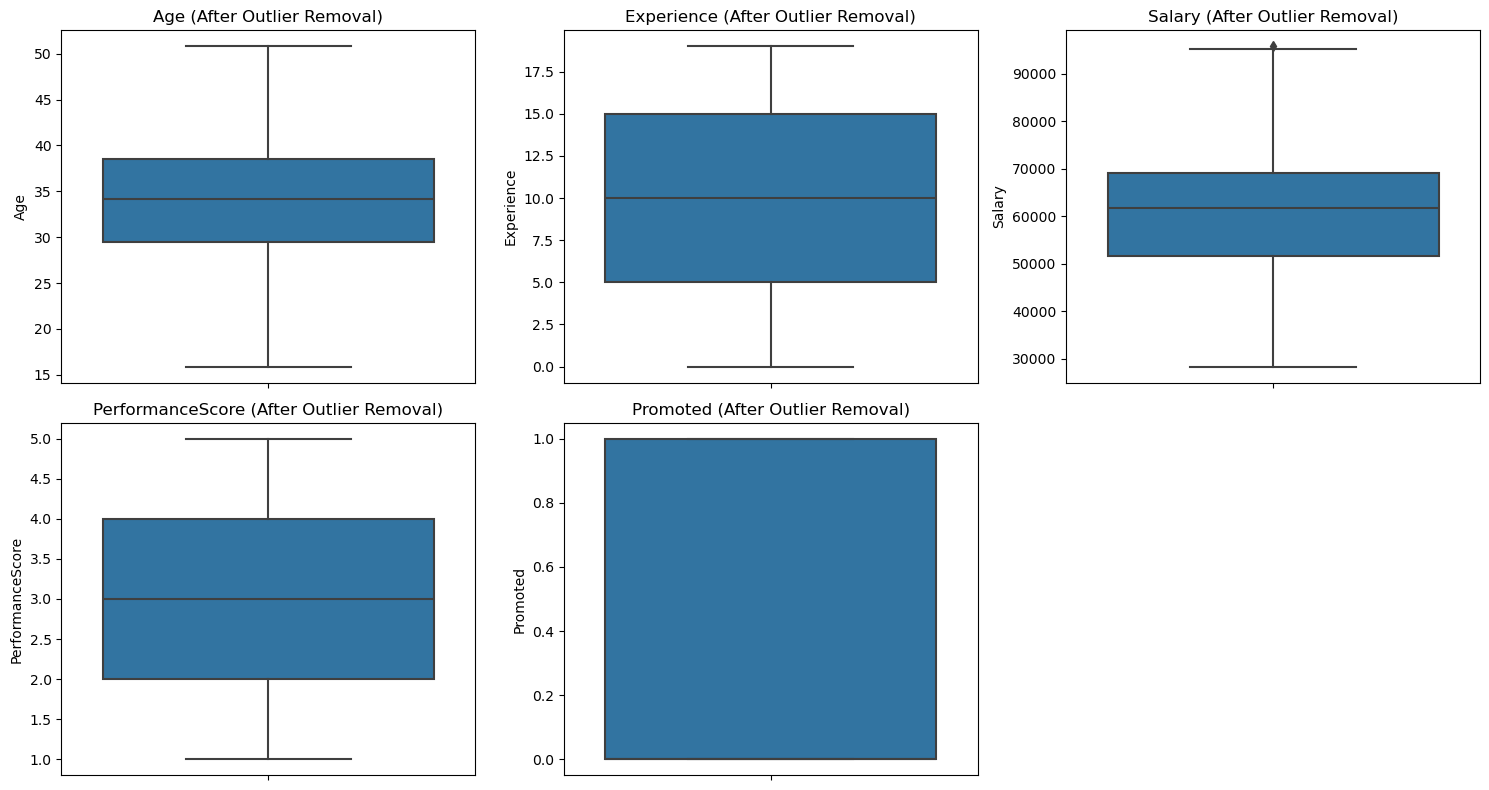

In [46]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, len(num_cols)//2 + 1, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f"{col} (After Outlier Removal)")

plt.tight_layout()
plt.show()

In [47]:
df_clean.isnull().sum()

Name                0
Age                 0
Gender              0
JobRole             0
Experience          0
Salary              0
EducationLevel      0
Location            0
Department          0
PerformanceScore    0
Promoted            0
dtype: int64

## EDA

### Correlation matrix

In [50]:
for i in df.columns:
    print(f"{i}: ",df[i].unique())

Name:  ['Person_0' 'Person_1' 'Person_2' 'Person_3' 'Person_4' 'Person_5'
 'Person_6' 'Person_7' 'Person_8' 'Person_9' 'Person_10' 'Person_11'
 'Person_12' 'Person_13' 'Person_14' 'Person_15' 'Person_16' 'Person_17'
 'Person_18' 'Person_19' 'Person_20' 'Person_21' 'Person_22' 'Person_23'
 'Person_24' 'Person_25' 'Person_26' 'Person_27' 'Person_28' 'Person_29'
 'Person_30' 'Person_31' 'Person_32' 'Person_33' 'Person_34' 'Person_35'
 'Person_36' 'Person_37' 'Person_38' 'Person_39' 'Person_40' 'Person_41'
 'Person_42' 'Person_43' 'Person_44' 'Person_45' 'Person_46' 'Person_47'
 'Person_48' 'Person_49' 'Person_50' 'Person_51' 'Person_52' 'Person_53'
 'Person_54' 'Person_55' 'Person_56' 'Person_57' 'Person_58' 'Person_59'
 'Person_60' 'Person_61' 'Person_62' 'Person_63' 'Person_64' 'Person_65'
 'Person_66' 'Person_67' 'Person_68' 'Person_69' 'Person_70' 'Person_71'
 'Person_72' 'Person_73' 'Person_74' 'Person_75' 'Person_76' 'Person_77'
 'Person_78' 'Person_79' 'Person_80' 'Person_81' 'Pers

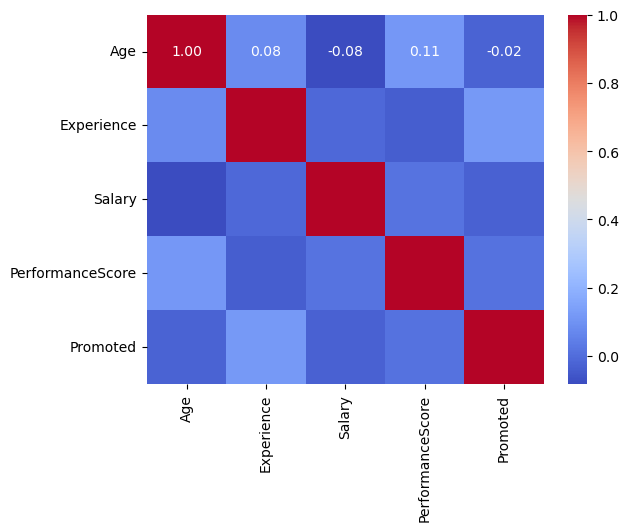

In [51]:
corr_matrix  = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Encoding

In [53]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [54]:
df_clean.head()

,Name,Age,Gender,JobRole,Experience,Salary,EducationLevel,Location,Department,PerformanceScore,Promoted
0,Person_0,40.0,Female,Engineer,9,31548.79,Bachelors,Urban,Finance,5,0
1,Person_1,33.6,Female,Analyst,18,68986.40,High School,Urban,IT,3,1
2,Person_2,41.5,Female,Manager,0,57478.94,High School,Rural,Finance,4,1
3,Person_3,50.2,Male,Clerk,4,64277.63,Bachelors,Rural,IT,5,0
4,Person_4,32.7,Female,Engineer,12,52921.20,PhD,Suburban,Finance,4,1


In [55]:
df_clean = pd.get_dummies(df_clean, columns=['Gender', 'JobRole','Location', 'Department'], drop_first=True)
df_clean.head()

,Name,Age,Experience,Salary,EducationLevel,PerformanceScore,Promoted,Gender_Male,JobRole_Clerk,JobRole_Engineer,JobRole_Manager,Location_Suburban,Location_Urban,Department_HR,Department_IT,Department_Marketing
0,Person_0,40.0,9,31548.79,Bachelors,5,0,False,False,True,False,False,True,False,False,False
1,Person_1,33.6,18,68986.40,High School,3,1,False,False,False,False,False,True,False,True,False
2,Person_2,41.5,0,57478.94,High School,4,1,False,False,False,True,False,False,False,False,False
3,Person_3,50.2,4,64277.63,Bachelors,5,0,True,True,False,False,False,False,False,True,False
4,Person_4,32.7,12,52921.20,PhD,4,1,False,False,True,False,True,False,False,False,False


In [56]:
df_encoded = df_clean.copy()

# Define the ordered categories for EducationLevel
education_order = [['High School', 'Bachelors', 'Masters', 'PhD']]

# Initialize and apply the OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=education_order)
df_encoded[['EducationLevel']] = ord_encoder.fit_transform(df_encoded[['EducationLevel']])

df_encoded[['EducationLevel']].head()

,EducationLevel
0,1.0
1,0.0
2,0.0
3,1.0
4,3.0


In [57]:
print("Original unique values:", df['EducationLevel'].unique())
print("Encoded unique values:", df_encoded['EducationLevel'].unique())


Original unique values: ['Bachelors' 'High School' 'PhD' 'Masters']
Encoded unique values: [1. 0. 3. 2.]


In [58]:
df_encoded.head()

,Name,Age,Experience,Salary,EducationLevel,PerformanceScore,Promoted,Gender_Male,JobRole_Clerk,JobRole_Engineer,JobRole_Manager,Location_Suburban,Location_Urban,Department_HR,Department_IT,Department_Marketing
0,Person_0,40.0,9,31548.79,1.0,5,0,False,False,True,False,False,True,False,False,False
1,Person_1,33.6,18,68986.40,0.0,3,1,False,False,False,False,False,True,False,True,False
2,Person_2,41.5,0,57478.94,0.0,4,1,False,False,False,True,False,False,False,False,False
3,Person_3,50.2,4,64277.63,1.0,5,0,True,True,False,False,False,False,False,True,False
4,Person_4,32.7,12,52921.20,3.0,4,1,False,False,True,False,True,False,False,False,False


### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler, RobustScaler

Standard = StandardScaler()
Robust = RobustScaler()
df = df_encoded
df[['Salary','PerformanceScore']] = Robust.fit_transform(df[['Salary','PerformanceScore']])
df[['Age', 'Experience']] = Standard.fit_transform(df[['Age', 'Experience']])
df.head()

,Name,Age,Experience,Salary,EducationLevel,PerformanceScore,Promoted,Gender_Male,JobRole_Clerk,JobRole_Engineer,JobRole_Manager,Location_Suburban,Location_Urban,Department_HR,Department_IT,Department_Marketing
0,Person_0,0.755541,-0.110843,-1.726778,1.0,1.0,0,False,False,True,False,False,True,False,False,False
1,Person_1,-0.063984,1.471543,0.421008,0.0,0.0,1,False,False,False,False,False,True,False,True,False
2,Person_2,0.947617,-1.693230,-0.239172,0.0,0.5,1,False,False,False,True,False,False,False,False,False
3,Person_3,2.061659,-0.989947,0.150867,1.0,1.0,0,True,True,False,False,False,False,False,True,False
4,Person_4,-0.179230,0.416619,-0.500648,3.0,0.5,1,False,False,True,False,True,False,False,False,False


### Train test split

In [62]:

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Name','Promoted'])
y = df['Promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7285714285714285


In [64]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7571428571428571


In [65]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.4857142857142857


In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8857142857142857


In [67]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.45714285714285713


In [68]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.45714285714285713


In [69]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.5142857142857142


In [70]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.4857142857142857
